In [17]:
import ants
import nibabel as nib
import numpy as np
import brainload as bl
import brainview as bv
from mayavi import mlab
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Raw ABIDE - ANTs cortical thickness

Generating cortical thickness visualizations from the first 3 subjects of the ABIDE I CMU A raw dataset

In [13]:
#plots the scan using ants.plot()
def plotnii(path):
    p1 = nib.load(path) #load with nibabel
    p1 = p1.get_fdata()
    ants1 = ants.core.from_numpy(p1) #pass data to ANTs for plotting
    ants.plot(ants1)
    return ants1

#plots the scan using matplotlib, plots the 100th slice.
def plotnii_matplot(path, slice_num):
    p1 = nib.load(path) #load with nibabel
    p1 = p1.get_fdata()
    ants1 = ants.core.from_numpy(p1) #pass data to ANTs for plotting
    plt.imshow(p1[slice_num])
    #p2 = p1.T                       #We can take the transpose to see a different axis view
    #plt.imshow(p2[slice_num])

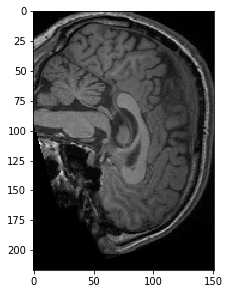

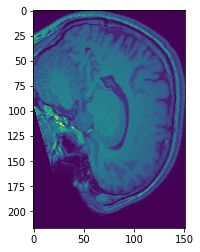

In [14]:
#Visualize the raw scans, first with ANTs, then with MatPlotLib.
I1 =  plotnii('./raw/mprage1.nii.gz')
I12 =  plotnii_matplot('./raw/mprage1.nii.gz', 100)

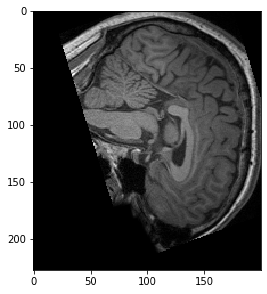

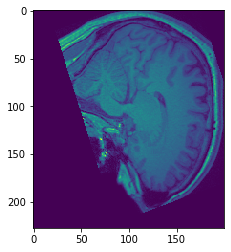

In [15]:
I2 =  plotnii('./raw/mprage2.nii.gz')
I22 =  plotnii_matplot('./raw/mprage2.nii.gz', 100)

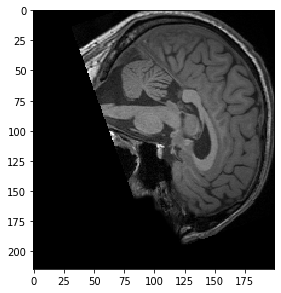

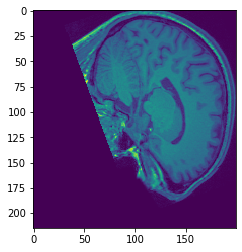

In [16]:
I3 =  plotnii('./raw/mprage3.nii.gz')
I32 =  plotnii_matplot('./raw/mprage3.nii.gz', 100)

In [20]:
#calculate DiReCT cortical thickness. Parameters still not optimized.
def thicknessComp(antsimg):
    mask = ants.get_mask(antsimg)
    segs = ants.kmeans_segmentation(antsimg, k=3, kmask = mask)
    thick = ants.kelly_kapowski(s=segs['segmentation'], 
                                g=segs['probabilityimages'][1],
                                w=segs['probabilityimages'][2], 
                                its=45,
                                r=0.5, m=1)
    ants.plot(thick)

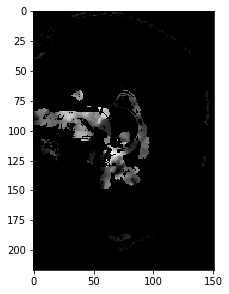

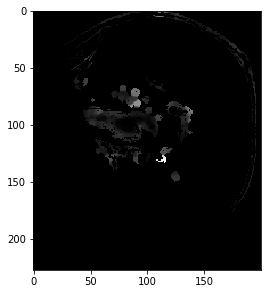

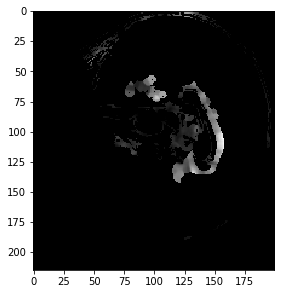

In [21]:
thicknessComp(I1)
thicknessComp(I2)
thicknessComp(I3)

# Preprocessed ABIDE - ANTs cortical thickness

Visualizing the cortical thickness of the same 3 subjects from the ABIDE preprocessed dataset

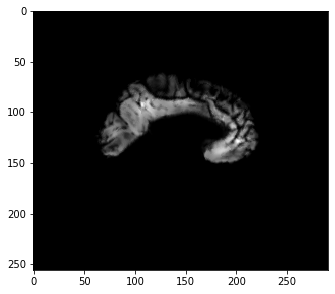

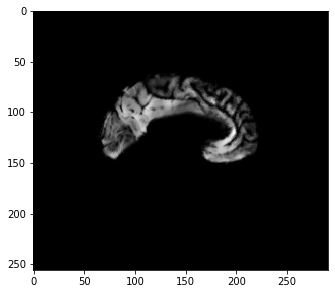

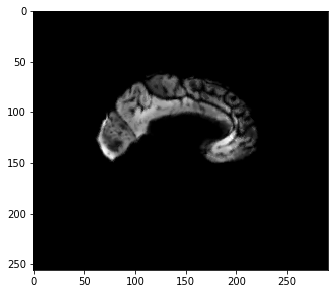

ANTsImage
	 Pixel Type : float
	 Components : 1
	 Dimensions : (216, 256, 291)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [11]:
plotnii('./preproc/ants/CMU_a_0050642_anat_thickness.nii.gz')
plotnii('./preproc/ants/CMU_a_0050646_anat_thickness.nii.gz')
plotnii('./preproc/ants/CMU_a_0050647_anat_thickness.nii.gz')

# Preprocessed ABIDE - FreeSurfer cortical thickness

In [19]:
def showFreeSurfer(subject_id, subjects_diri):
    vert_coords, faces, morphometry_data, morphometry_meta_data = bl.subject(subject_id, 
                                                                           hemi='lh', 
                                                                           measure='thickness', 
                                                                           subjects_dir=subjects_diri)
    #figure and scene creation.
    fig = mlab.figure('FreeSurfer cortical thicknesses', bgcolor=(1, 1, 1), size=(800, 600)) 
    #create mlab mesh, add to scene
    surface = bv.brain_morphometry_view(fig, vert_coords, faces, morphometry_data) 
    #interactive viewing panel.
    bv.show() 

 Note that these are displayed as a 3D interactive mesh, unlike the ANTs visualization above.

In [20]:
showFreeSurfer("1", "./preproc/fs")

In [21]:
showFreeSurfer("2", "./preproc/fs")

In [22]:
showFreeSurfer("3", "./preproc/fs")

Screenshots of these 3D visualizations:

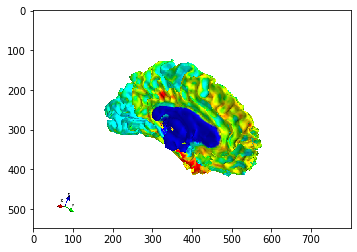

In [23]:
img=mpimg.imread('./preproc/fs/1/surf/snapshot1.png')
imgplot = plt.imshow(img)
plt.show()

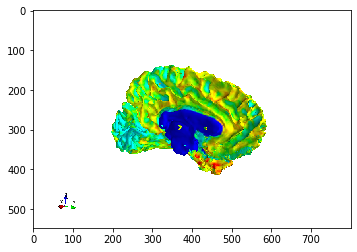

In [24]:
img=mpimg.imread('./preproc/fs/2/surf/snapshot2.png')
imgplot = plt.imshow(img)
plt.show()

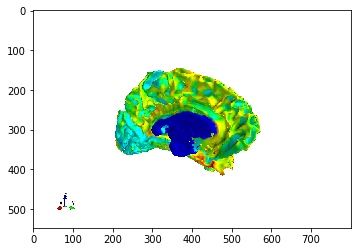

In [25]:
img=mpimg.imread('./preproc/fs/3/surf/snapshot3.png')
imgplot = plt.imshow(img)
plt.show()